<b>Folha 3 - Distribuições binomial, de Poisson e de Gauss </b>
- Exercício 6

Maria Inês Teixeira Gama - 20200315

Esta variável segue uma distribuição binomial, uma vez que cumpre todos os requisitos: 
    - O número de testes é finito, sendo neste caso 50 pacientes;
    - Só existem dois resultados possíveis a cada teste, receber a vacina ou receber placebo;
    - Os resultados são independentes uns dos outros.
<p> A sua representação gráfica é: </p>

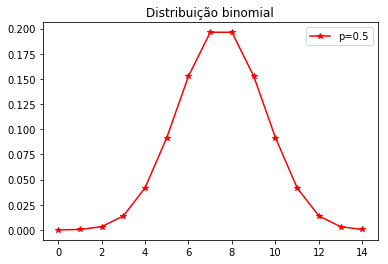

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import binom  #módulo que possui a função binomial
p=0.5
n=15
def f(k,n,p):
    return binom.pmf(k,n,p)
k = np.arange(0,15)
plt.plot(k,f(k,n,p),'-*', label="p=0.5",color="red")
plt.title("Distribuição binomial")
plt.legend()

<b> alínea a) </b>

In [8]:
%matplotlib inline
import os
import matplotlib.pyplot as plt 
import numpy as np
import math
from scipy.stats import binom  #módulo que possui a função binomial
p=0.5
n=15 #numero de pacientes escolhidos
k=6
p=(binom.pmf(k,n,p))  #P[X=6]
print("A probabilidade de 6 pessoas das 15 terem recebido a vacina é %.2f" % (p*100) + "%")

A probabilidade de 6 pessoas das 15 terem recebido a vacina é 15.27%


Esta probabilidade tanto pode ser calculada através da biblioteca scipy ou recorrendo à fórmula:
$$P(k,n)=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$$ <p> Então, através de código: </p>

In [9]:
%matplotlib inline
import os
import numpy as np
import math
import matplotlib.pyplot as plt 
def factorial(x):
    factorial=1
    for i in range(1,x+1):
        factorial = factorial*i
    return factorial
def binomial(k, n, p):
    binomial = factorial(n) / (factorial(k)*factorial(n-k))* p**k * (1 - p)**(n-k)
    return binomial
print("A probabilidade de 6 pessoas das 15 terem recebido a vacina é %.2f" % (binomial(6,15,0.5)*100) + "%")

A probabilidade de 6 pessoas das 15 terem recebido a vacina é 15.27%


<b> alínea b) </b>

Para esta alínea temos de determinar a função de distribuição cumulativa, uma vez que pretendemos saber a probabilidade de 3 ou mais pessoas terem recebido a vacina.
Da mesma forma, podemos reccorer às bibliotecas ou através de código, aplicando a seguinte fórmula:
$$cdf(k,n)=\sum_{i=0}^{k}\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i}$$

In [10]:
%matplotlib inline
import os
import matplotlib.pyplot as plt 
import numpy as np
import math
from scipy.stats import binom  #módulo que possui a função binomial
p=0.5
n=15 #numero de pacientes escolhidos
k=2
p3=(1-binom.cdf(k,n,p))*100 #P[X>=3]=1-P[X<=2]
print("A  probabilidade de 3 ou mais pessoas ter recebido a vacina é %.2f" % p3 + "%")

A  probabilidade de 3 ou mais pessoas ter recebido a vacina é 99.63%


In [11]:
def factorial(x):
    factorial=1
    for i in range(1,x+1):
        factorial = factorial*i
    return factorial
def cumulative(s, p, n):
    cum = 0.0
    c = n
    for j in range(0,s+1):
        cum += factorial(c) / (factorial(j)*factorial(c-j))* p**j * (1 - p)**(c-j)
    return cum
p1=(1-cumulative(2,0.5,15))*100
print("A  probabilidade de 3 ou mais pessoas ter recebido a vacina é %.2f" % p1 + "%")

A  probabilidade de 3 ou mais pessoas ter recebido a vacina é 99.63%


<b> alínea c) </b>

Se se tivessem escolhido 600 pessoas para o estudo estariamos perante um tamanho amostral muito grande. <p> Podemos fazer então uma aproximação à distribuição de Poisson, caso se verifique $np\geq30$. No entanto este critério é válido para valores de p pequenos, que não é o caso.</p>
<p> Apesar disso pode-se resolver o problema através da aproximação á distribuição de Poisson,assumindo que $\lambda=np$ e que n tende para infinito e posteriormente comparar com a própria distribuição binomial, através do desvio padrão.
<p> A distribuição de Poisson é dada por: </p>
$$P(k,n)=\frac{\lambda^k}{k!}e^{-\lambda}$$

In [12]:
from scipy.stats import poisson  #módulo que possui a distribuição de poisson

# a condição n*p verifica-se. usa-se a aproximação de Poisson
p=0.5
n=600
l=n*p
k=275
p=poisson.pmf(k,l)*100
print("A probabilidade de 275 pessoas terem recebido a vacina é %.2f" % p+ "%")

#o desvio padrão de uma distribuição de Poisson é a raiz quadrada de lambda.
dp=(l)**0.5
print("O desvio padrão desta distribuição é %.2f" %dp)

A probabilidade de 275 pessoas terem recebido a vacina é 0.82%
O desvio padrão desta distribuição é 17.32


In [13]:
from scipy.stats import binom  #módulo que possui a função binomial
p=0.5
q=1-p
n=600 #numero de pacientes escolhidos
k=275
prob=(binom.pmf(k,n,p))
print("A probabilidade de 275 pessoas das 600 terem recebido a vacina é %.2f" % (prob*100) + "%")

# o desvio padrão de uma distribuição binomial é:
dp_binom=(n*p*q)**0.5
print("O desvio padrão desta distribuição é %.2f" %dp_binom)

A probabilidade de 275 pessoas das 600 terem recebido a vacina é 0.41%
O desvio padrão desta distribuição é 12.25


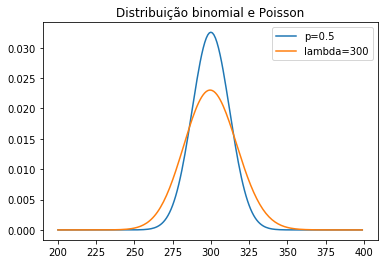

In [14]:
%matplotlib inline
import numpy as np
from scipy.stats import poisson
from scipy.stats import binom  
import matplotlib.pyplot as plt

p=0.5
n=600
l=n*p
def fb(k,n,p):
    return binom.pmf(k,n,p)

def fp(x,l):
    return poisson.pmf(k,l)

k = np.arange(200,400)
plt.plot(k,fb(k,n,p),'-', label="p=0.5")
plt.plot(k,fp(k,l),'-', label="lambda=300")
plt.title("Distribuição binomial e Poisson")
plt.legend()

pode-se ainda recorrer à distruibição de Gauss para confirmar estas aproximações. <p> Como esta distribuição é contínua não existe probabilidade pontual $(P[X=275])$. Logo pode-se considerar um intervalo e calcular a probabilidade desse intervalo, por exemplo $P[274.5 < X < 275.5]$

In [16]:
from scipy.stats import norm

p=0.5
q=1-p
n=600
mu=n*p
sigma= (n*p*q)**0.5
def normal(x,mu,sigma):
    return norm.cdf(x,mu,sigma)

prob=(normal(275.5,mu,sigma)-normal(274.5,mu,sigma))*100
#Pr{274.5 < X < 275.5} = P(X< 275.5)-P(X< 274.5)
print("A probabilidade de encontrar um valor entre 274.5 e 275.5 é %.2f" %prob + "%")
print("O desvio padrão desta distribuição é %.2f" %sigma)

A probabilidade de encontrar um valor entre 274.5 e 275.5 é 0.41%
O desvio padrão desta distribuição é 12.25


Percebe-se assim, que a distribuição de Poisson não é uma boa aproximação.